##### Copyright 2023 Google LLC. SPDX-License-Identifier: Apache-2.0

Copyright 2023 Google LLC. SPDX-License-Identifier: Apache-2.0

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

## **LLMs as General Pattern Machines:** CartPole Environment

Large language models (LLMs) are trained to absorb the myriad of patterns that are woven into the structure of language. We observe that they are capable of autoregressively completing complex token sequences -- from arbitrary ones procedurally generated by probabilistic context-free grammars (PCFG), to more rich spatial patterns found in the Abstract Reasoning Corpus (ARC), a general AI benchmark, prompted in the style of ASCII art. Surprisingly, pattern completion proficiency can be partially retained even when the sequences are expressed using tokens randomly sampled from the vocabulary. These results suggest that without any additional training, LLMs can serve as general sequence modelers, driven by in-context learning. In this work, we investigate how these zero-shot capabilities may be applied to problems in robotics.

This colab explores least-to-most prompting of reward-conditioned trajectories that can discover and represent closed-loop policies to in-context learn a stabilizing controller for CartPole. While difficult to deploy today for real systems due to latency, context size limitations, and compute costs, the approach of using LLMs to drive low-level control may provide an exciting glimpse into how the patterns among words could be transferred to actions.

### **Quick Start:**

**Step 1.** Register for an [OpenAI API key](https://openai.com/blog/openai-api/) to use GPT-3 (there's a free trial) and enter it below

**Step 2.** Menu > Runtime > Run all

In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

/Users/epideixx/Documents/NUS/CS6216/Research_Project/LLM-x-RL-greedy-strategy/.llm_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████| 1.46k/1.46k [00:00<00:00, 2.36MB/s]
tokenizer.model: 100%|██████████| 493k/493k [00:00<00:00, 18.0MB/s]
tokenizer.json: 100%|██████████| 1.80M/1.80M [00:00<00:00, 2.48MB/s]
special_tokens_map.json: 100%|██████████| 72.0/72.0 [00:00<00:00, 144kB/s]
config.json: 100%|██████████| 596/596 [00:00<00:00, 1.90MB/s]
model.safetensors.index.json: 100%|██████████| 25.1k/25.1k [00:00<00:00, 16.8MB/s]
model-00001-of-00003.safetensors: 100%|██████████| 4.94G/4.94G [02:44<00:00, 30.0MB/s]
model-00002-of-00003.safetensors: 100%|██████████| 5.00G/5.00G [02:47<00:00, 29.8MB/s]
model-00003-of-00003.safetensors: 100%|██████████| 4.54G/4.54G [02:

In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

device = "cuda" # the device to load the model onto

messages = [
    {"role": "user", "content": "What is your favourite condiment?"},
    {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
    {"role": "user", "content": "Do you have mayonnaise recipes?"}
]

encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

model_inputs = encodeds.to(device)
model.to(device)

generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])


In [11]:
prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt")

# Generate
generate_ids = model.generate(inputs.input_ids, max_length=30)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: 

In [9]:
class MistralLLM():

    def __init__(self, tokenizer, model):
        super(MistralLLM, self).__init__()
        self.tokenizer = tokenizer
        self.model = model

    def __call__(self, prompt, max_tokens=256):
        inputs = self.tokenizer(prompt, return_tensors="pt")
        print(inputs)
        generate_ids = model.generate(inputs.input_ids, max_length=max_tokens)
        print(generate_ids)
        response = tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
        print(response)

        return response

LLM = MistralLLM(tokenizer=tokenizer, model=model)

In [10]:
prompt = "Hey, are you conscious? Can you talk to me?"
LLM(prompt)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{'input_ids': tensor([[    1, 17162, 28725,   460,   368,  9994, 28804,  2418,   368,  1985,
           298,   528, 28804]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


KeyboardInterrupt: 

In [1]:
import json 
key_path = "key.json"
with open(key_path, 'r') as file:
    openai_api_key = json.load(file)["api_key"]

## **Setup**

This only needs a CPU (public) runtime.

In [ ]:
!pip install gymnasium[classic-control]
!pip install openai
!pip install transformers
!pip install tiktoken

In [3]:
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from openai import OpenAI
# from transformers import GPT2Tokenizer
import tiktoken


pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


## **LLM** Functions
**Note**: this can get expensive. 200 episodes is a few dollars with text-ada-001, but up to few hundred dollars for text-davinci-003+

In [26]:
# This does GPT-3 inference.
model_name = "gpt-4-turbo-preview"

class ApiLLM():

  def __init__(self):
      super(ApiLLM, self).__init__()
      self.client = OpenAI(api_key=openai_api_key)

  def __call__(self, prompt, max_tokens=256, stop=None, temperature=0.0):
    response = self.client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            stream=False,
            max_tokens=max_tokens,
            stop=stop,
            temperature=temperature
        )
    text = [choice.message.content for choice in response.choices]
    return text if len(text) > 1 else text[0]
  
LLM = ApiLLM()

# Handshake to make sure we can talk to the LLM.
print(LLM("hello world!"))
print(LLM("Complete following sequence : 1 2 3 4 5 6 7 8 9"))

Hello! How can I assist you today?
10


## **CartPole** Environment

This wraps the CartPole environment and makes it LLM friendly:
* Reduce observation to just pole angle position and velocity.
* Normalize pole angle position from [-0.25, 0.25] to [0, 100] ints.
* Normalize pole angle velocity from [-3.00, 3.00] to [0, 100] ints.

In [21]:
class CartPoleEnv:

  def __init__(self):
    self.env = gym.make("CartPole-v1")  #, render_mode="human"
    self.reset()

  def reset(self):
    obs, info = self.env.reset()
    self.terminated = False
    self.reward = 0
    self.state = self.norm_state([obs[2], obs[3]])  # Pole angle and velocity.
    return self.state

  def step(self, act):
    obs, reward, terminated, truncated, info = self.env.step(act)
    self.state = self.norm_state([obs[2], obs[3]])
    self.terminated = terminated or truncated
    self.reward += np.int32(reward)
    return self.state

  def random_act(self):
    return self.env.action_space.sample()

  def norm_state(self, state):
    p = (np.clip(state[0], -0.25, 0.25) + 0.25) * (100 / 0.5)
    v = (np.clip(state[1], -3, 3) + 3) * (100 / 6)
    return int(np.round(p)), int(np.round(v))

  def state_to_str(self, state):
    return f" {state[0]} {state[1]}"

  def act_to_str(self, act):
    # LLMs bias on 0 so make the actions 1 and 2 instead.
    return f" {act + 1}"

  def str_to_act(self, str):
    return int(str) - 1

## Sequence **Improvement**
Online in-context policy optimization with online rollouts (max reward is 200).

Invalid action '8 35'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 62, 2, 81 57, 2,

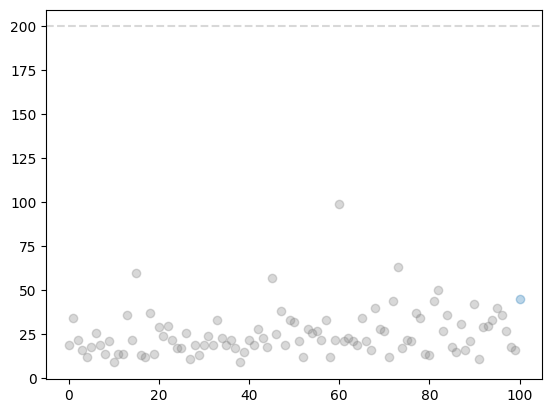

Invalid action '8'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 62, 2, 81 57, 2, 82

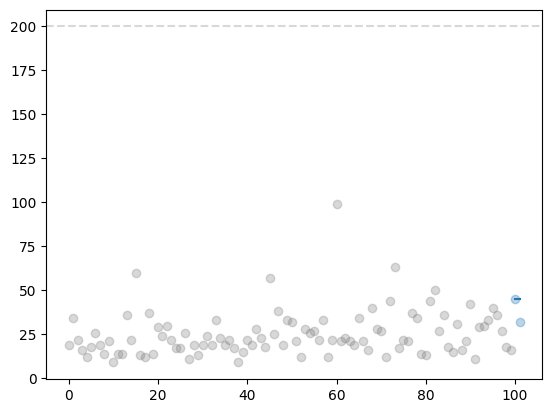

Invalid action '120: 46'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 62, 2, 81 57,

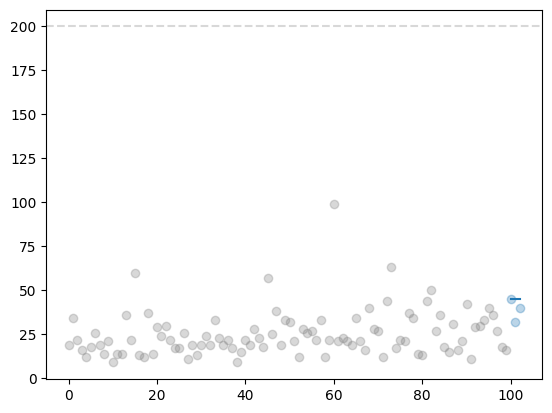

Invalid action 'The sequences provided appear'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 6

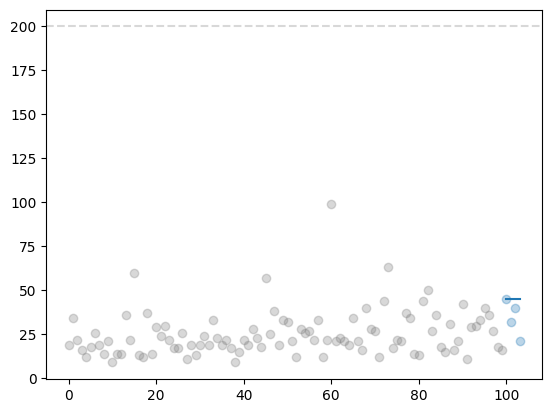

Invalid action 'The sequence you've'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 6

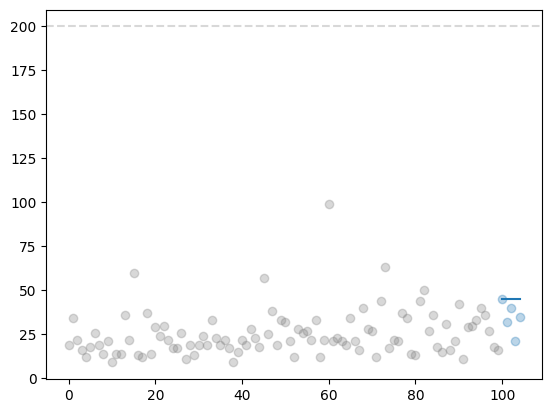

Invalid action 'Based on the pattern'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 

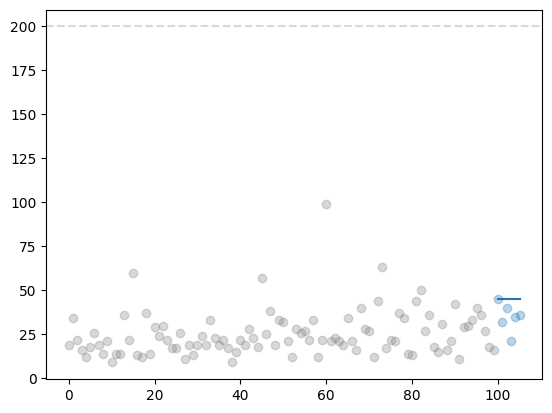

Invalid action '8'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 62, 2, 81 57, 2, 82

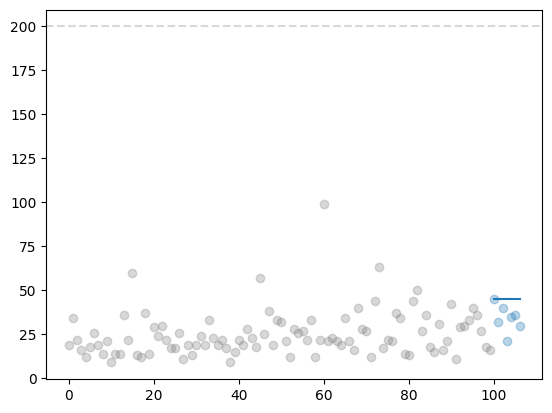

Invalid action '127: 48'. Sampling random one.
60: 57 50, 2, 57 45, 2, 56 41, 1, 54 46, 1, 52 51, 2, 53 46, 2, 52 41, 2, 50 36, 1, 46 41, 1, 44 46, 1, 43 51, 1, 43 55, 2, 44 50, 2, 45 45, 1, 43 50, 1, 43 55, 1, 44 59, 2, 47 54, 1, 48 59, 2, 50 54, 2, 51 49, 1, 51 54, 1, 52 59, 2, 54 54, 2, 55 49, 1, 55 54, 2, 56 50, 2, 56 45, 2, 55 40, 2, 52 36, 1, 49 40, 1, 46 45, 2, 45 40, 2, 43 35, 1, 39 40, 1, 37 45, 1, 36 49, 1, 36 54, 2, 36 48, 1, 36 53, 1
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1, 43 54, 2, 44 49, 2, 43 44, 1, 42 48, 1, 41 53, 2, 42 48, 1, 42 53, 2, 42 47, 2, 42 42, 1, 40 47, 1, 39 52, 1, 39 56, 1, 41 61, 2, 43 56, 2, 45 51, 1, 45 55, 1, 46 60, 2, 49 55, 2, 50 50, 2, 50 45, 2, 49 40, 1, 46 45, 1, 45 50, 2, 45 45, 1, 44 50, 1, 44 55, 2, 45 49, 2, 45 44, 1, 44 49, 1, 43 54, 1, 44 59, 1, 46 63, 2, 50 58, 2, 52 54, 2, 53 49, 1, 52 54, 1, 53 59, 2, 55 54, 2, 56 49, 2, 56 44, 1, 54 49, 1, 54 54, 1, 55 59, 1, 58 64, 1, 61 69, 2, 66 65, 1, 69 70, 2, 74 66, 2, 78 62, 2, 81 57,

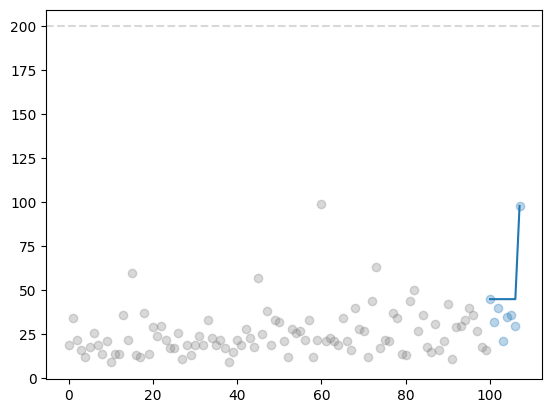

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

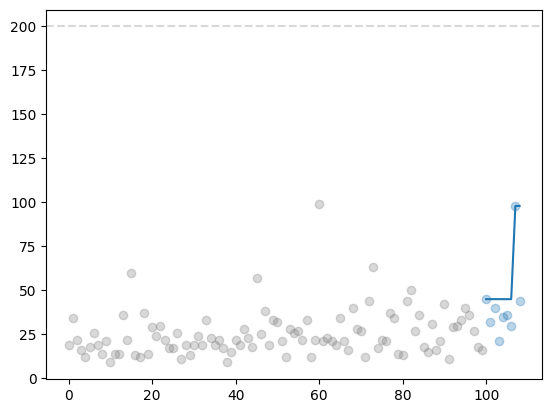

Invalid action '127: 47'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 65, 2, 57 60, 2, 59 55,

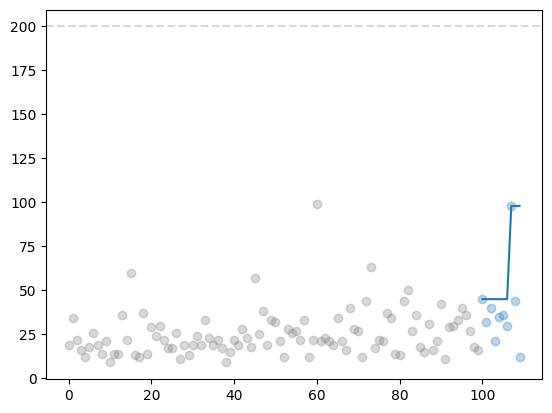

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

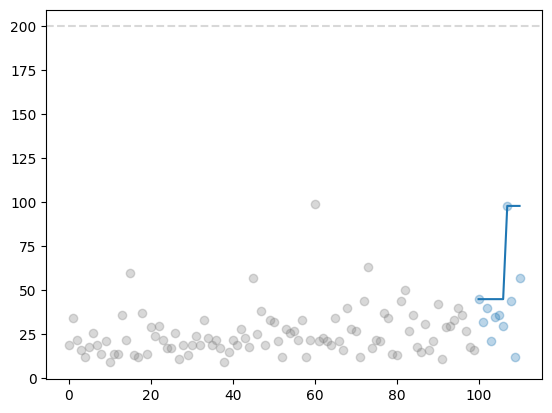

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

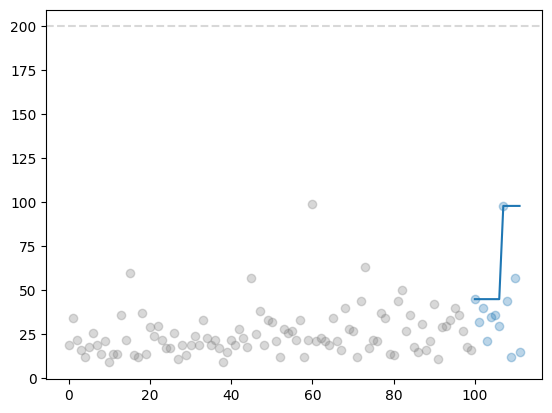

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

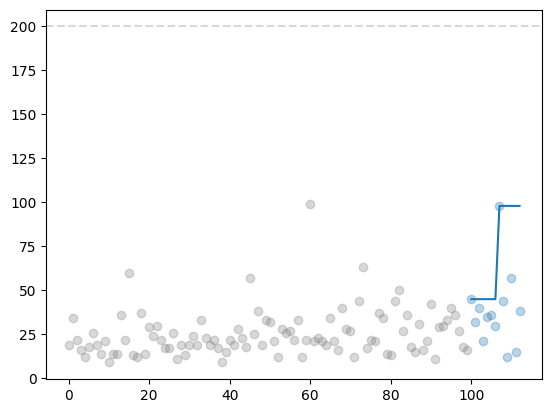

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

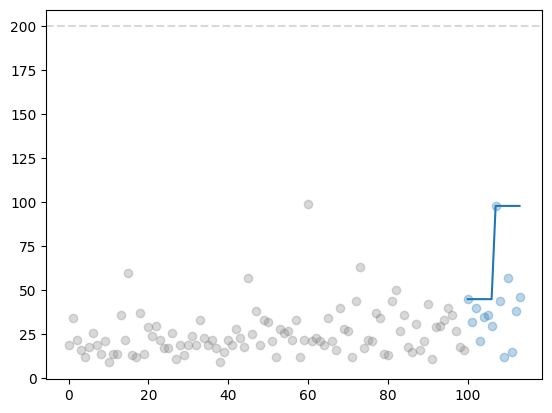

Invalid action 'The sequences provided appear'. Sampling random one.
63: 48 49, 2, 48 44, 2, 47 39, 1, 44 44, 1, 43 49, 1
98: 48 49, 2, 48 45, 1, 46 49, 2, 46 44, 2, 45 39, 1, 42 44, 1, 41 49, 1, 41 53, 2, 41 48, 2, 41 43, 1, 39 48, 1, 39 52, 1, 39 57, 2, 41 52, 2, 42 47, 1, 41 51, 1, 41 56, 2, 43 51, 2, 43 46, 1, 42 51, 1, 42 55, 2, 43 50, 2, 43 45, 1, 42 50, 1, 42 54, 1, 43 59, 2, 45 54, 1, 46 59, 1, 48 64, 2, 52 59, 2, 54 54, 2, 55 49, 1, 54 54, 1, 55 59, 2, 58 54, 2, 59 50, 1, 59 55, 1, 60 60, 2, 62 55, 2, 63 51, 2, 64 46, 2, 63 42, 1, 61 47, 2, 60 42, 1, 58 47, 2, 57 43, 2, 56 38, 2, 53 33, 1, 49 38, 1, 46 43, 1, 44 48, 2, 44 43, 1, 42 48, 1, 42 52, 1, 42 57, 2, 44 52, 2, 44 47, 2, 43 42, 2, 41 37, 1, 38 41, 1, 36 46, 2, 35 41, 2, 33 35, 1, 29 40, 1, 27 44, 1, 26 48, 1, 25 53, 2, 26 47, 2, 25 42, 2, 23 36, 1, 20 40, 1, 17 44, 1, 16 48, 1, 16 52, 1, 16 56, 1, 18 60, 1, 20 64, 2, 23 58, 1, 25 62, 1, 28 67, 2, 32 61, 1, 35 66, 1, 39 70, 2, 44 65, 2, 47 60, 2, 50 55, 1, 51 60, 1, 53 6

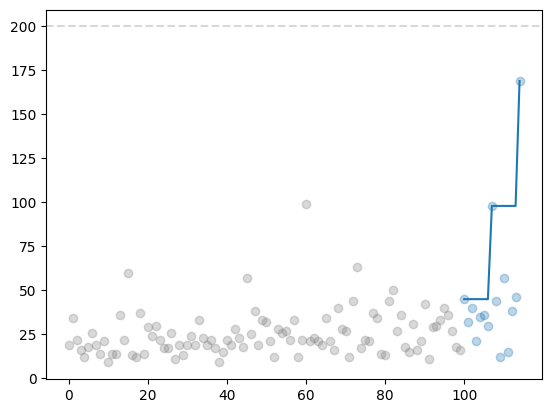

99: 49 50, 2, 49 45, 1, 48 50, 2, 48 45, 1, 46 50, 2, 46 45, 1, 45 50, 2, 45 45, 1, 44 49, 2, 44 44, 2, 42 39, 2, 40 34, 1, 36 39, 1, 33 43, 2, 32 38, 1, 29 42, 2, 27 37, 1, 24 41, 1, 22 45, 1, 21 50, 1, 21 54, 1, 22 58, 1, 23 62, 2, 26 56, 2, 28 51, 2, 28 45, 1, 27 50, 1, 27 54, 2, 28 48, 1, 27 53, 2, 28 47, 1, 27 51, 1, 28 56, 1, 29 60, 2
169: 53 50, 2, 53 45, 1, 52 50, 1, 52 55, 2, 54 50, 2, 54 46, 1, 53 51, 1, 53 56, 2, 54 51, 2, 54 46, 1, 53 51, 1, 54 56, 2, 55 51, 2, 55 46, 1, 54 51, 1, 55 56, 2, 56 52, 2, 57 47, 1, 56 52, 1, 57 57, 2, 58 52, 2, 59 48, 1, 58 53, 1, 59 58, 2, 61 53, 2, 62 49, 2, 61 44, 1, 60 49, 1, 60 54, 2, 61 50, 2, 61 45, 1, 60 50, 1, 60 55, 2, 61 51, 2, 61 46, 1, 60 51, 1, 61 57, 2, 62 52, 2, 63 47, 2, 62 43, 1, 60 48, 1, 60 53, 2, 61 49, 2, 60 44, 2, 59 39, 1, 56 45, 1, 55 50, 1, 55 55, 2, 56 50, 2, 56 45, 2, 55 40, 1, 53 45, 1, 51 50, 1, 51 55, 2, 53 50, 2, 53 46, 1, 52 51, 1, 52 55, 2, 53 51, 2, 53 46, 1, 52 51, 1, 53 56, 2, 54 51, 2, 54 46, 1, 53 51, 1, 54

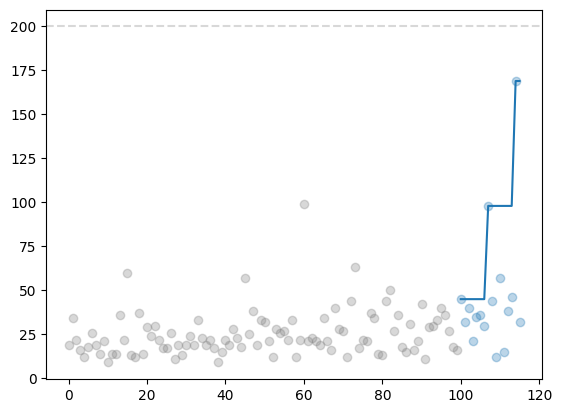

99: 49 50, 2, 49 45, 1, 48 50, 2, 48 45, 1, 46 50, 2, 46 45, 1, 45 50, 2, 45 45, 1, 44 49, 2, 44 44, 2, 42 39, 2, 40 34, 1, 36 39, 1, 33 43, 2, 32 38, 1, 29 42, 2, 27 37, 1, 24 41, 1, 22 45, 1, 21 50, 1, 21 54, 1, 22 58, 1, 23 62, 2, 26 56, 2, 28 51, 2, 28 45, 1, 27 50, 1, 27 54, 2, 28 48, 1, 27 53, 2, 28 47, 1, 27 51, 1, 28 56, 1, 29 60, 2
169: 53 50, 2, 53 45, 1, 52 50, 1, 52 55, 2, 54 50, 2, 54 46, 1, 53 51, 1, 53 56, 2, 54 51, 2, 54 46, 1, 53 51, 1, 54 56, 2, 55 51, 2, 55 46, 1, 54 51, 1, 55 56, 2, 56 52, 2, 57 47, 1, 56 52, 1, 57 57, 2, 58 52, 2, 59 48, 1, 58 53, 1, 59 58, 2, 61 53, 2, 62 49, 2, 61 44, 1, 60 49, 1, 60 54, 2, 61 50, 2, 61 45, 1, 60 50, 1, 60 55, 2, 61 51, 2, 61 46, 1, 60 51, 1, 61 57, 2, 62 52, 2, 63 47, 2, 62 43, 1, 60 48, 1, 60 53, 2, 61 49, 2, 60 44, 2, 59 39, 1, 56 45, 1, 55 50, 1, 55 55, 2, 56 50, 2, 56 45, 2, 55 40, 1, 53 45, 1, 51 50, 1, 51 55, 2, 53 50, 2, 53 46, 1, 52 51, 1, 52 55, 2, 53 51, 2, 53 46, 1, 52 51, 1, 53 56, 2, 54 51, 2, 54 46, 1, 53 51, 1, 54

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [34]:
init_episodes = 100
max_episodes = 200
temperature = 0.0
max_context = 1020  # In tokens.

# Memory bank with reward-labeled episodes: each is a list of state-action tuples.
episodes = []
rewards = []

env = CartPoleEnv()
LLM = ApiLLM()

# Generate some random policy rollouts and add them to memory.
while len(episodes) < init_episodes:
  episode = []
  s = env.reset()
  while not env.terminated:
    a = env.random_act()
    episode.append((s, a))
    s = env.step(a)
  episodes.append(episode)
  rewards.append(env.reward)

# Incremental rollouts with the LLM in the loop.
while len(episodes) < max_episodes:

  # Set a desired reward for the current rollout.
  desired_reward = np.max(rewards) + 20 + np.int32(np.random.uniform() * 10)
  prompt = f"{desired_reward}:"

  # Environment reset.
  state = env.reset()
  buffer = []

  while not env.terminated and env.reward < 200:
    prompt += f"{env.state_to_str(state)},"
    num_tokens = len(prompt.split(" "))

    # Build context of episodes sorted by ascending rewards.
    context = ""
    for i in np.argsort(rewards)[::-1]:
      if num_tokens + 10 > max_context:  # Each episode should have at least 10 tokens.
        break
      episode, reward = episodes[i], rewards[i]
      size = min(len(episode), (max_context - num_tokens) // 5)
      text = f"{reward}:" + ",".join([f"{env.state_to_str(s)},{env.act_to_str(a)}" for s, a in episode[:size]])
      num_tokens += 2 + size * 5   # Manual math here to count tokens. Calling the tokenizer too much can get slow.
      context = f"{text}\n{context}"

    # LLM inference.
    query = "\nJust complete the sequence."
    pred = LLM(context + prompt + query, max_tokens=4, stop=[",", "\n"], temperature=temperature)

    # If predicted action is invalid, sample random action.
    # Alternatively, one can sample the LLM from only the set of valid actions
    # by using a logit bias. This is the approach we take in our experiments.
    try:
      act = env.str_to_act(pred.strip())
    except:
      act = -1
    if act not in [0, 1]:
      print(f"Invalid action '{pred}'. Sampling random one.")
      act = env.random_act()

    prompt += f"{env.act_to_str(act)},"
    buffer.append((state, act))

    # Show LLM input.
    print(context + prompt)
    print("---------------------------------------------------------")
    print("Num episodes:", len(episodes), "Curr highest return:", np.max(rewards))
    print("---------------------------------------------------------")

    # Step environment.
    state = env.step(act)

  episodes.append(buffer)
  rewards.append(env.reward)

  # Make a plot of performance over time.
  plt.scatter(np.arange(init_episodes), rewards[:init_episodes], c="gray", alpha=0.3)
  plt.scatter(np.arange(init_episodes, len(rewards)), rewards[init_episodes:], alpha=0.3)
  max_over_time = [rewards[init_episodes]]
  for reward in rewards[init_episodes+1:]:
    max_over_time.append(max(reward, max_over_time[-1]))
  plt.plot(np.arange(init_episodes, len(rewards)), max_over_time)
  plt.axhline(y=200, color='gray', linestyle='--', alpha=0.3)
  plt.show()